In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import time
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageDraw
import random

In [2]:
#Random start of population
#genomes as a list of gene sequences
def initialise():
    genomes =[]
    for i in range(4):
        genomes.append([np.random.randint(2, size=6)]) # add 5 randomly initialised indiviudals
    
    #entschachtelungsprozess
    ent = [5]*len(genomes)
    i = 0
    for k in genomes:
        for l in k:
            
            ent[i] =l
            i = i+1
    

    return ent

    

In [3]:
#usefull functions

def paring(mom,dad):
    return(np.concatenate((mom[:3], dad[3:]), axis=0))

def entschachteln(genos):
    print(len(genos))
    neue = [0,0]
    i = 0
    for k in genos:
        for l in k:
            print(l)
            neue[i] =l
            i = i+1

    return (neue)

def mutation(popul):
    position = random.randrange(0, len(popul))
    gencode = popul[position]
    
    decider = random.uniform(0, 1)
    posi = 0
    if decider < 0.1 :
        print('Mutation')
        posi = random.randrange(0, len(gencode))
    
        if gencode[posi] == 1:
            gencode[posi] = 0
        elif gencode[posi] == 0:
            gencode[posi] = 1
            
    popul[position] = np.array(gencode)
    
    return popul

''' A one to one replacement reproduction '''
def selected(maxis, actualpop): 
    childs= []
    maxis= np.array(maxis)
    indices = maxis.argsort()[-4:][::-1]
    print('Highest acc at')
    print(indices)
    parents= []
    
   
    for ind in indices:    
        parents.append(actualpop[ind])
            
    print('PPPPPP')
    print(parents)
    random.shuffle(parents)
    f= 0
    print(parents)
    
    #### was passiert ungerade zahl geht nicht und 50 eltern überleben
    # 1 un2 2un3
    while f < len(parents)-1: 
        mom = parents[f]
        f= f +1
        dad = parents[f]     
        child = paring(mom,dad)
        childs.append(child)
        child = paring(dad,mom)
        childs.append(child)
        
        
    return childs

In [4]:
def netzdurchlauf(acutalpop):
    accuracy_of_population= []
    
    print('Aktuelle Population')
    print(actualpop)
    for element in actualpop:
        batch_size = 128
        num_classes = 10
        epochs = 12

        # input image dimensions
        img_rows, img_cols = 28, 28

        # the data, split between train and test sets
        (x_train, y_train), (x_test, y_test) = mnist.load_data()

        if K.image_data_format() == 'channels_first':
            x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
            x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
            input_shape = (1, img_rows, img_cols)
        else:
            x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
            x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
            input_shape = (img_rows, img_cols, 1)

        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        x_train /= 255
        x_test /= 255
#             print('x_train shape:', x_train.shape)
#             print(x_train.shape[0], 'train samples')
#             print(x_test.shape[0], 'test samples')

        # convert class vectors to binary class matrices
        y_train = keras.utils.to_categorical(y_train, num_classes)
        y_test = keras.utils.to_categorical(y_test, num_classes)

        model = Sequential()




        model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
        model.add(Conv2D(64, (3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
            ########
            
            

        for gen in element:
            if (gen== 0):
                model.add(Conv2D(64, (3, 3), activation='relu'))
            elif (gen == 1):
                model.add(Dense(128, activation='relu'))




        model.add(Flatten())
        model.add(Dropout(0.5))
        model.add(Dense(num_classes, activation='softmax'))

        model.compile(loss=keras.losses.categorical_crossentropy,
                          optimizer=keras.optimizers.Adadelta(),
                          metrics=['accuracy'])

        model.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(x_test, y_test))
        score = model.evaluate(x_test, y_test, verbose=0)
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])
        accuracy_of_population.append(score[1])
        
    return (accuracy_of_population)

In [5]:
def fortpflanzung (maxis, actualpop):
    childs= []
    maxis= np.array(maxis)
    indices = maxis.argsort()[-2:][::-1] # hier verändern, wenn wir individuen anzahl erhöhen die erste zahl muss die hälfte der anzahl sein
    print('Highest acc at')
    print(indices)
    parents= []
    
    
    for ind in indices:    
        parents.append(actualpop[ind])
   
    
    print('PPPPPP')
    print(parents)
    random.shuffle(parents)
    f= 0
    print(parents)
    #parents = entschachteln(parents)
    
    while f < len(parents): 
        print(f)
        f = f -1
        mom = parents[f]
        f= f +1
        print(f)
        dad = parents[f]    
        f= f +1
        decider = random.uniform(0, 1) # decides random how the cross-over works
        if decider < 0.5 :
            child = paring(mom,dad)
            childs.append(child)
        else:
            child = paring(dad,mom)
            childs.append(child)

    
#         child = paring(mom,dad)
#         childs.append(child)
    
#             child = paring(dad,mom)
#             childs.append(child)

#     while f < len(parents)-1: 
#         mom = parents[f]
#         f= f +1
#         dad = parents[f]     
#         child = paring(mom,dad)
#         childs.append(child)
#         child = paring(dad,mom)
#         childs.append(child)
    print('CCCCCCC')
    print(childs)
    parents = np.concatenate((parents, childs), axis=0) 
    
    print('OVERALL')
    print(parents)
    print(len(parents))
    return parents

In [6]:

# Hauptmethode
start = time.time()


DURCHGÄNGE = 6 # variable to clarify number of generations
actualpop= initialise()

#actualpop= entschachteln(actualpop)
evalaccuris = []
saved = actualpop
i = 1
    
while i < DURCHGÄNGE+1:
    
    nummer = i
    accuri = netzdurchlauf(actualpop)
    print(' Accuracy of populationnummer: ')
    print( nummer)
    print(accuri)
    print('highest accuracy of populationnummer: ')
    print( nummer)
    print(np.amax(accuri))
    #print(actualpop)
    actualpop = fortpflanzung(accuri, actualpop)
    actualpop = mutation(actualpop)
   
    evalaccuris.append([i ,np.amax(accuri), sum(accuri)/len(accuri)])
    i = i+1
    
    
    
print('The highest accuracies in population')
print(evalaccuris)  

print('Wartezeit: ')
end = time.time()
seconds = end - start
minutes = seconds / 60
print(minutes)

Aktuelle Population
[array([0, 0, 0, 0, 1, 1]), array([0, 0, 0, 1, 1, 0]), array([1, 1, 0, 0, 0, 0]), array([1, 0, 1, 0, 1, 1])]


W0920 13:37:51.609639 15840 deprecation_wrapper.py:119] From C:\Users\vivia\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0920 13:37:51.622620 15840 deprecation_wrapper.py:119] From C:\Users\vivia\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0920 13:37:51.624612 15840 deprecation_wrapper.py:119] From C:\Users\vivia\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0920 13:37:51.651532 15840 deprecation_wrapper.py:119] From C:\Users\vivia\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0920 13:37:51.654522 15840 deprecation_wrapper.py:119] From C:\Users\vivia\Ana

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 11s 190us/step - loss: 0.3783 - acc: 0.8774 - val_loss: 0.0672 - val_acc: 0.9768
Epoch 2/12
60000/60000 [==============================] - 8s 141us/step - loss: 0.0700 - acc: 0.9788 - val_loss: 0.0448 - val_acc: 0.9861
Epoch 3/12
60000/60000 [==============================] - 8s 140us/step - loss: 0.0470 - acc: 0.9851 - val_loss: 0.0362 - val_acc: 0.9879
Epoch 4/12
60000/60000 [==============================] - 8s 141us/step - loss: 0.0367 - acc: 0.9885 - val_loss: 0.0267 - val_acc: 0.9923
Epoch 5/12
60000/60000 [==============================] - 9s 143us/step - loss: 0.0291 - acc: 0.9909 - val_loss: 0.0194 - val_acc: 0.9942
Epoch 6/12
60000/60000 [==============================] - 8s 139us/step - loss: 0.0242 - acc: 0.9928 - val_loss: 0.0217 - val_acc: 0.9932
Epoch 7/12
60000/60000 [==============================] - 8s 140us/step - loss: 0.0214 - acc: 0.9935 - val_loss: 0.0194 -

60000/60000 [==============================] - 8s 141us/step - loss: 0.0310 - acc: 0.9908 - val_loss: 0.0261 - val_acc: 0.9910
Epoch 6/12
60000/60000 [==============================] - 8s 141us/step - loss: 0.0268 - acc: 0.9914 - val_loss: 0.0265 - val_acc: 0.9920
Epoch 7/12
60000/60000 [==============================] - 8s 140us/step - loss: 0.0226 - acc: 0.9930 - val_loss: 0.0204 - val_acc: 0.9934
Epoch 8/12
60000/60000 [==============================] - 8s 138us/step - loss: 0.0193 - acc: 0.9940 - val_loss: 0.0300 - val_acc: 0.9915
Epoch 9/12
60000/60000 [==============================] - 8s 138us/step - loss: 0.0177 - acc: 0.9943 - val_loss: 0.0251 - val_acc: 0.9915
Epoch 10/12
60000/60000 [==============================] - 8s 140us/step - loss: 0.0155 - acc: 0.9953 - val_loss: 0.0210 - val_acc: 0.9931
Epoch 11/12
60000/60000 [==============================] - 9s 142us/step - loss: 0.0137 - acc: 0.9957 - val_loss: 0.0233 - val_acc: 0.9932
Epoch 12/12
60000/60000 [==================

Epoch 10/12
60000/60000 [==============================] - 9s 144us/step - loss: 0.0159 - acc: 0.9948 - val_loss: 0.0204 - val_acc: 0.9944
Epoch 11/12
60000/60000 [==============================] - 9s 144us/step - loss: 0.0139 - acc: 0.9955 - val_loss: 0.0321 - val_acc: 0.9914
Epoch 12/12
60000/60000 [==============================] - 9s 143us/step - loss: 0.0121 - acc: 0.9962 - val_loss: 0.0181 - val_acc: 0.9946
Test loss: 0.018118250372678814
Test accuracy: 0.9946
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 170us/step - loss: 0.3813 - acc: 0.8764 - val_loss: 0.0664 - val_acc: 0.9785
Epoch 2/12
60000/60000 [==============================] - 9s 145us/step - loss: 0.0838 - acc: 0.9744 - val_loss: 0.0485 - val_acc: 0.9857
Epoch 3/12
60000/60000 [==============================] - 9s 150us/step - loss: 0.0556 - acc: 0.9833 - val_loss: 0.0323 - val_acc: 0.9895
Epoch 4/12
60000/60000 [==============================] - 9s 151

Epoch 2/12
60000/60000 [==============================] - 11s 176us/step - loss: 0.0813 - acc: 0.9749 - val_loss: 0.0413 - val_acc: 0.9856
Epoch 3/12
60000/60000 [==============================] - 10s 170us/step - loss: 0.0549 - acc: 0.9830 - val_loss: 0.0317 - val_acc: 0.9895
Epoch 4/12
60000/60000 [==============================] - 10s 170us/step - loss: 0.0442 - acc: 0.9864 - val_loss: 0.0422 - val_acc: 0.9871
Epoch 5/12
60000/60000 [==============================] - 11s 177us/step - loss: 0.0380 - acc: 0.9880 - val_loss: 0.0266 - val_acc: 0.9922
Epoch 6/12
60000/60000 [==============================] - 11s 176us/step - loss: 0.0328 - acc: 0.9899 - val_loss: 0.0213 - val_acc: 0.9932
Epoch 7/12
60000/60000 [==============================] - 11s 178us/step - loss: 0.0279 - acc: 0.9912 - val_loss: 0.0207 - val_acc: 0.9930
Epoch 8/12
60000/60000 [==============================] - 11s 178us/step - loss: 0.0256 - acc: 0.9919 - val_loss: 0.0209 - val_acc: 0.9937
Epoch 9/12
60000/60000 [===

60000/60000 [==============================] - 10s 175us/step - loss: 0.0300 - acc: 0.9906 - val_loss: 0.0248 - val_acc: 0.9918
Epoch 7/12
60000/60000 [==============================] - 11s 177us/step - loss: 0.0254 - acc: 0.9921 - val_loss: 0.0206 - val_acc: 0.9932
Epoch 8/12
60000/60000 [==============================] - 10s 175us/step - loss: 0.0234 - acc: 0.9926 - val_loss: 0.0238 - val_acc: 0.9917
Epoch 9/12
60000/60000 [==============================] - 11s 179us/step - loss: 0.0211 - acc: 0.9935 - val_loss: 0.0225 - val_acc: 0.9932
Epoch 10/12
60000/60000 [==============================] - 11s 177us/step - loss: 0.0190 - acc: 0.9940 - val_loss: 0.0213 - val_acc: 0.9932
Epoch 11/12
60000/60000 [==============================] - 11s 190us/step - loss: 0.0180 - acc: 0.9944 - val_loss: 0.0203 - val_acc: 0.9944
Epoch 12/12
60000/60000 [==============================] - 13s 208us/step - loss: 0.0167 - acc: 0.9945 - val_loss: 0.0205 - val_acc: 0.9932
Test loss: 0.02045985019147738
Test

60000/60000 [==============================] - 12s 200us/step - loss: 0.0208 - acc: 0.9932 - val_loss: 0.0203 - val_acc: 0.9936
Epoch 11/12
60000/60000 [==============================] - 12s 194us/step - loss: 0.0195 - acc: 0.9938 - val_loss: 0.0217 - val_acc: 0.9929
Epoch 12/12
60000/60000 [==============================] - 12s 205us/step - loss: 0.0179 - acc: 0.9940 - val_loss: 0.0226 - val_acc: 0.9937
Test loss: 0.02262539964258831
Test accuracy: 0.9937
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 15s 250us/step - loss: 0.3223 - acc: 0.8986 - val_loss: 0.0636 - val_acc: 0.9803
Epoch 2/12
60000/60000 [==============================] - 13s 210us/step - loss: 0.0815 - acc: 0.9752 - val_loss: 0.0424 - val_acc: 0.9855
Epoch 3/12
60000/60000 [==============================] - 12s 206us/step - loss: 0.0566 - acc: 0.9824 - val_loss: 0.0324 - val_acc: 0.9889
Epoch 4/12
60000/60000 [==============================] - 12s 193us/step

(0.99, 1)

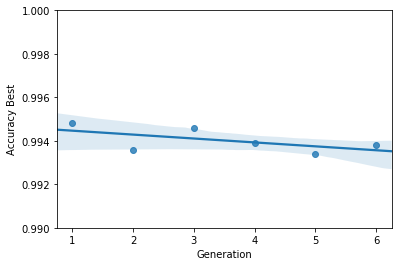

In [10]:
#Visualisation
df = pd.DataFrame(data =evalaccuris)
df.rename(columns={0: 'Generation',1:'Accuracy Best',2: 'Accuracy mean'}, inplace=True)
df
sns.regplot(x=df['Generation'],y=df['Accuracy Best'])
plt.ylim(0.990, 1)


(0.99, 1)

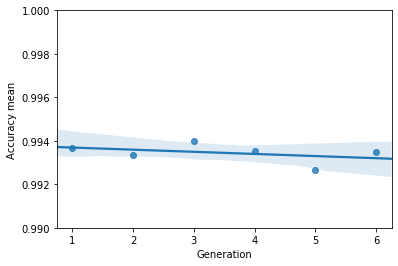

In [11]:
#Visualisation von dem durchschnitt der accuracy

sns.regplot(x=df['Generation'],y=df['Accuracy mean'])
plt.ylim(0.990, 1)

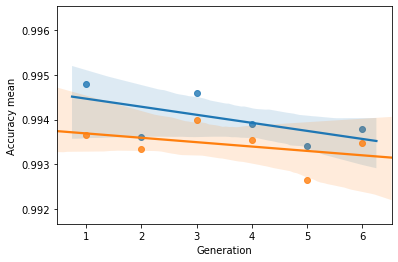

In [25]:

 
ax1 =sns.regplot(x=df['Generation'],y=df['Accuracy Best'])
ax0 =sns.regplot(x=df['Generation'],y=df['Accuracy mean'])


In [ ]:
# wievielschwnakung 
